### Face Detection

#### 사용 이유

- 얼굴 인식, 분석, 트래킹
- 고급 작업의 전처리
    - 같은 사람인지 비교
    - 성별, 나이, 감정, 마스크 착용 여부 등을 판단
    - 고개 방향이나 시선 추적에도 얼굴 감지가 선행됨
    - 얼굴만 골라 블러 처리 또는 모자이크
    - 필터 적용, 안경/모자 씌우기 등 얼굴 위치를 기반으로 하는 서비스
- 프라이버시 보호
    - 영상 속 얼굴을 자동으로 감지해서 블러 처리
    - CCTV 영상에서 얼굴 자동 검출 -> 비식별화 처리
- 보안 및 인증
    - 출입 시스템, 스마트폰 언락

In [1]:
endpoint = "https://1sesac035-ai-services.cognitiveservices.azure.com/"
key = "43GeeA8FXKT0ORWoZN2jwBLOKB3J3FgEDYSswuHuHylZN6eDxlgrJQQJ99BFACi5YpzXJ3w3AAAEACOGkiGI"

In [2]:
pip install --upgrade azure-ai-vision-face

Note: you may need to restart the kernel to use updated packages.


In [3]:
face_endpoint = "https://1sesac035-ai-services.cognitiveservices.azure.com/"
face_apikey = "43GeeA8FXKT0ORWoZN2jwBLOKB3J3FgEDYSswuHuHylZN6eDxlgrJQQJ99BFACi5YpzXJ3w3AAAEACOGkiGI"

Detecting faces in Images/people.webp
4 faces detected.

Face number 1
 - Head Pose (Yaw): 22.3
 - Head Pose (Pitch): -14.0
 - Head Pose (Roll): -27.3
 - Blur: BlurLevel.MEDIUM
 - Mask: MaskType.NO_MASK

Face number 2
 - Head Pose (Yaw): 21.6
 - Head Pose (Pitch): -14.7
 - Head Pose (Roll): -17.0
 - Blur: BlurLevel.MEDIUM
 - Mask: MaskType.NO_MASK

Face number 3
 - Head Pose (Yaw): -4.0
 - Head Pose (Pitch): -16.2
 - Head Pose (Roll): -5.6
 - Blur: BlurLevel.LOW
 - Mask: MaskType.NO_MASK

Face number 4
 - Head Pose (Yaw): 36.8
 - Head Pose (Pitch): -11.2
 - Head Pose (Roll): 16.7
 - Blur: BlurLevel.MEDIUM
 - Mask: MaskType.NO_MASK

Results saved in detected_faces.jpg


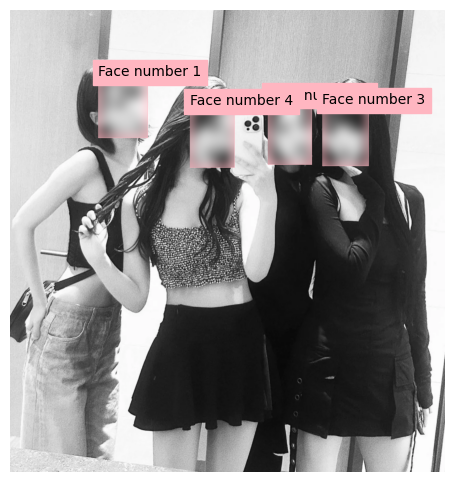

In [4]:
import os
from PIL import Image, ImageDraw, ImageFilter
from matplotlib import pyplot as plt

# Import namespaces
from azure.ai.vision.face import FaceClient
from azure.ai.vision.face.models import FaceDetectionModel, FaceRecognitionModel, FaceAttributeTypeDetection03
from azure.core.credentials import AzureKeyCredential

def main():

    global face_client

    try:
        # Authenticate Face client
        face_client = FaceClient(
            endpoint=face_endpoint,
            credential=AzureKeyCredential(face_apikey)
        )

        # Face 서비스의 가장 기본적인 기능 중 하나는 이미지에서 얼굴을 감지하고 머리 포즈, 흐림, 마스크 유무 등과 같은 속성을 확인하는 것입니다.
        DetectFaces(os.path.join('Images','people.webp'))

    except Exception as ex:
        print(ex)

def DetectFaces(image_file):
    print('Detecting faces in', image_file)

    # Specify facial features to be retrieved
    features = [FaceAttributeTypeDetection03.HEAD_POSE,
                FaceAttributeTypeDetection03.BLUR,
                FaceAttributeTypeDetection03.MASK]

    # Get faces
    with open(image_file, mode="rb") as image_data:
        detected_faces = face_client.detect(
            image_content=image_data.read(),
            detection_model=FaceDetectionModel.DETECTION03,
            recognition_model=FaceRecognitionModel.RECOGNITION04,
            return_face_id=False,
            return_face_attributes=features,
        )

        if len(detected_faces) > 0:
            print(len(detected_faces), 'faces detected.')

            # Prepare image for drawing
            fig = plt.figure(figsize=(8, 6))
            plt.axis('off')
            image = Image.open(image_file)
            draw = ImageDraw.Draw(image)
            color = 'lightpink'
            face_count = 0

            # Draw and annotate each face
            for face in detected_faces:

                # Get face properties
                face_count += 1
                print('\nFace number {}'.format(face_count))
                print(' - Head Pose (Yaw): {}'.format(face.face_attributes.head_pose.yaw))
                print(' - Head Pose (Pitch): {}'.format(face.face_attributes.head_pose.pitch))
                print(' - Head Pose (Roll): {}'.format(face.face_attributes.head_pose.roll))
                print(' - Blur: {}'.format(face.face_attributes.blur.blur_level))
                print(' - Mask: {}'.format(face.face_attributes.mask.type))

                # Draw and annotate face
                r = face.face_rectangle
                bounding_box = ((r.left, r.top), (r.left + r.width, r.top + r.height))
                draw = ImageDraw.Draw(image)
                draw.rectangle(bounding_box, outline=color, width=5)

                # 얼굴 블러 처리 추가
                face_region = image.crop((r.left, r.top, r.left + r.width, r.top + r.height))
                blurred_face = face_region.filter(ImageFilter.GaussianBlur(radius=15))
                image.paste(blurred_face, (r.left, r.top))

                annotation = 'Face number {}'.format(face_count)
                plt.annotate(annotation,(r.left, r.top), backgroundcolor=color)

            # Save annotated image
            plt.imshow(image)
            outputfile = 'detected_faces.jpg'
            fig.savefig(outputfile)

            print('\nResults saved in', outputfile)

if __name__ == "__main__":
    main()

### OpenCV Face Detection

#### OpenCV란?
- 실시간 이미지 및 비디오 처리를 지원
- 다양한 알고리즘과 함수들을 통해 복잡한 컴퓨터 비전 작업을 간편하게 수행
- **사용 예시**
    - 이미지 처리
    - 비디오 처리
    - 기하학적 변환
    - 특징 검출 및 매칭
    - 객체 검출 및 추적
    - 3D 재구성
    - 머신 러닝

In [5]:
pip install gradio opencv-python

Note: you may need to restart the kernel to use updated packages.


#### OpenCV를 통한 Image Face Detection

In [ ]:
import cv2

image = cv2.imread('./images/people.webp')

cascPath = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(cascPath)

# 그레이스케일로 변환
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 얼굴을 검출합니다
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags=cv2.CASCADE_SCALE_IMAGE
)
# 검출된 얼굴에 사각형 그리기 
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2.imshow('Face Detection', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### OpenCV를 통한 Video Face Detection

In [ ]:
import cv2

cap = cv2.VideoCapture(0)
cascPath = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(cascPath)

def mosaic(image, x, y, w, h, ratio=0.05):
    face = image[y:y+h, x:x+w]
    # 축소했다가 다시 확대 (픽셀 뭉개짐)
    small = cv2.resize(face, (0, 0), fx=ratio, fy=ratio, interpolation=cv2.INTER_LINEAR)
    mosaic_face = cv2.resize(small, (w, h), interpolation=cv2.INTER_NEAREST)
    image[y:y+h, x:x+w] = mosaic_face
    return image

while True:
    ret, frame = cap.read()
    if not ret:
        print('웹캠 동작 안함')
        break
    # 그레이스케일로 변환
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 얼굴을 검출합니다
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE1ㅂㅂㅂㅂㅂ
    )

    # 얼굴마다 모자이크 적용
    for (x, y, w, h) in faces:
        frame = mosaic(frame, x, y, w, h)

    # 검출된 얼굴에 사각형 그리기
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.imshow('Face Detection from WebCam', frame)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

: 

### Gradio를 이용한 Face Detection

In [1]:
import gradio as gr

def stream_webcam(image):
    return image

with gr.Blocks() as demo:
    with gr.Row():
        webcam_input = gr.Image(label='카메라', sources="webcam", streaming=True, width=480, height=300)
        webcam_output = gr.Image(label='얼굴 검출')
    webcam_input.stream(fn=stream_webcam, inputs=[webcam_input], outputs=[webcam_output])

demo.launch()

/opt/anaconda3/envs/py313/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
